# MSE Efficiency Calibrator
Objective : Find out the point of highest effeciency (lowest possible time and error) when training a model through gradient descent. I will use linear regression to demonstrate the same. Outlining of the method starts in the "Calculating Effeciency" section, all code prior to that is for creating and running the model.

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [2]:
# Example Data
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

## Mean Squared Error
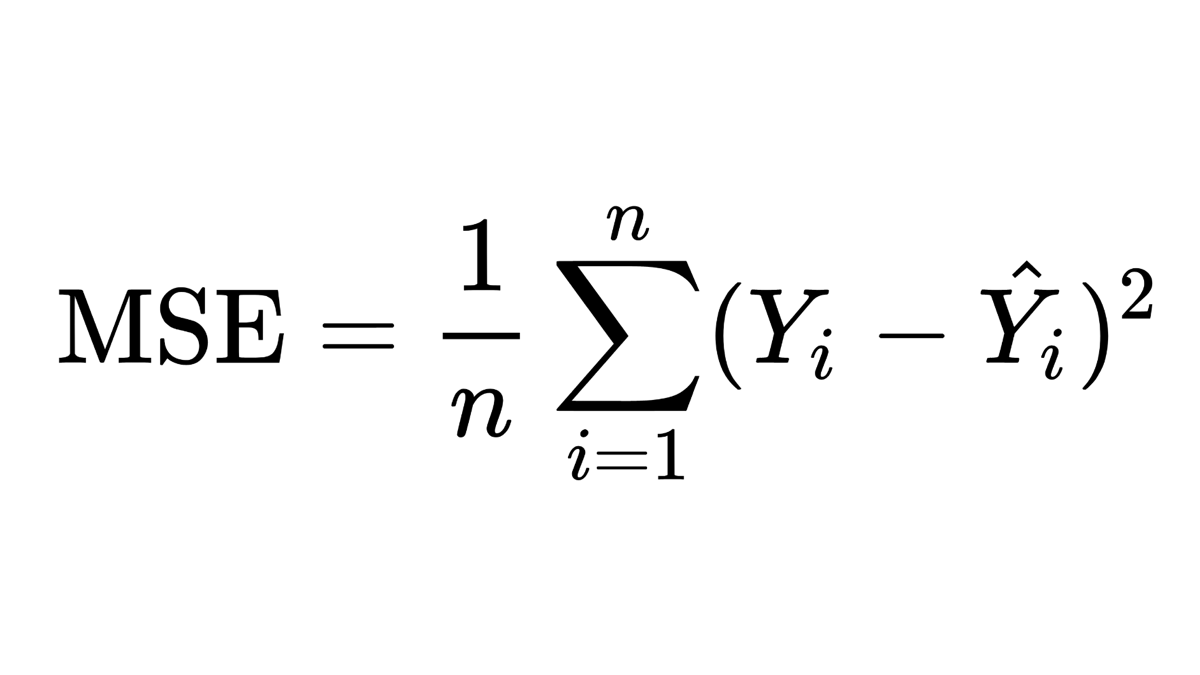

In [3]:
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

## Gradient Descent
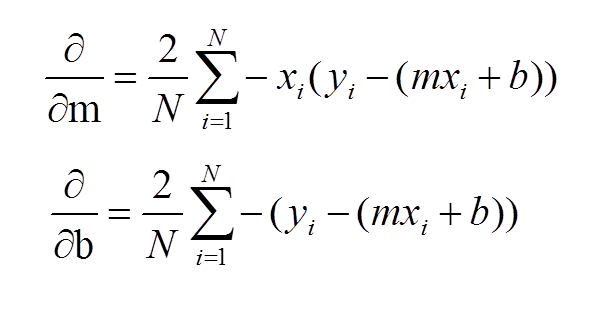

In [4]:
def compute_gradient(x, y, w, b): 
    """
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [5]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in)
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            
        
        J_history.append( cost_function(x, y, w , b))
        p_history.append([w,b])
        
        if (i != 0 and i% math.ceil(num_iters/10) == 0) or i == num_iters:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ")
 
    return w, b, J_history, p_history

In [6]:
# Parameters
w_init = 0
b_init = 0

iterations = 100000
tmp_alpha = 1.0e-2

# Running Gradient Descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration 10000: Cost 6.74e-06 
Iteration 20000: Cost 3.09e-12 
Iteration 30000: Cost 1.42e-18 
Iteration 40000: Cost 1.26e-23 
Iteration 50000: Cost 1.26e-23 
Iteration 60000: Cost 1.26e-23 
Iteration 70000: Cost 1.26e-23 
Iteration 80000: Cost 1.26e-23 
Iteration 90000: Cost 1.26e-23 


## Calculating Effeciency

<font size="3">
To calculate the efficiency (E) of the model at each iteration, we can take the product of the value of the cost function (J) and the index of the iteration (assuming the index starts from 1). This shows a value suitable to represent the relative accuracy of the model (i.e how precise the co-effecients are) and the time taken (i.e number of iterations).
</font>
<br>
<br>
<font size="3">
Every iteration this value increases due to the nature of an arthemetic product however at the point where it decreases, it shows that effeciency is declining or in other words for every 1 unit increase in iterations, there is a less than 1 unit decrease in cost. Therefore the point before said index is the one with maximum possible effeciency.
</font>


In [7]:
J_hist_eff = []
changePoint = 0

for i in range(1, len(J_hist)+1):
    # print(f"{J_hist[i]} x {i} = {J_hist[i] * i}")
    J_hist_eff.append(J_hist[i-1] * i)
    if i != 0: 
        if J_hist_eff[i-1] < J_hist_eff[i-2]:
            changePoint = i
            
print(f"First 10 Costs : {J_hist[:10]}\n")
print(f"First 10 Effeciencies : {J_hist_eff[:10]}\n")
print(f"Check For Equal Length (Debugging) : {len(J_hist) == len(J_hist_eff)}\n")
print(f"Changing Point: {changePoint}")

First 10 Costs : [79274.8125, 73935.3097265625, 68955.50943163194, 64311.1797016098, 59979.72104335757, 55940.056413659375, 52172.52865702032, 48658.804852726775, 45381.78710571535, 42325.52934715345]

First 10 Effeciencies : [79274.8125, 147870.619453125, 206866.52829489583, 257244.7188064392, 299898.60521678784, 335640.3384819563, 365207.70059914223, 389270.4388218142, 408436.0839514382, 423255.2934715345]

Check For Equal Length (Debugging) : True

Changing Point: 38107


In [8]:
# There is an extra subtraction in each index as the for loop above started with index 1 whereas lists start from 0
print(f"Highest Effeciency: {J_hist_eff[changePoint-2]}")
print(f"Succesor To Highest (To Show Decrease): {J_hist_eff[changePoint-2]}\n")
# print(J_hist[changePoint-2])
# print(J_hist[changePoint-1])
# print(J_hist[changePoint])
# print("\n")
print(f"Coeffecients (w,b) at the most effecient index: {p_hist[changePoint][0]} & {p_hist[changePoint][1]}")

Highest Effeciency: 4.825659911160569e-19
Succesor To Highest (To Show Decrease): 4.825659911160569e-19

Coeffecients (w,b) at the most effecient index: 199.99999999999005 & 100.00000000001565


## Proof Through Visualization

This learning curve comparison shows that after about 1000 iterations, the learning curve starts becoming flatter and by the millionth iteration it is *almost* completely a straight line. My method can be used to figure out at which point on this curve the iterations took more time relative to the amount of cost they decreased (i.e. became ineffecient)

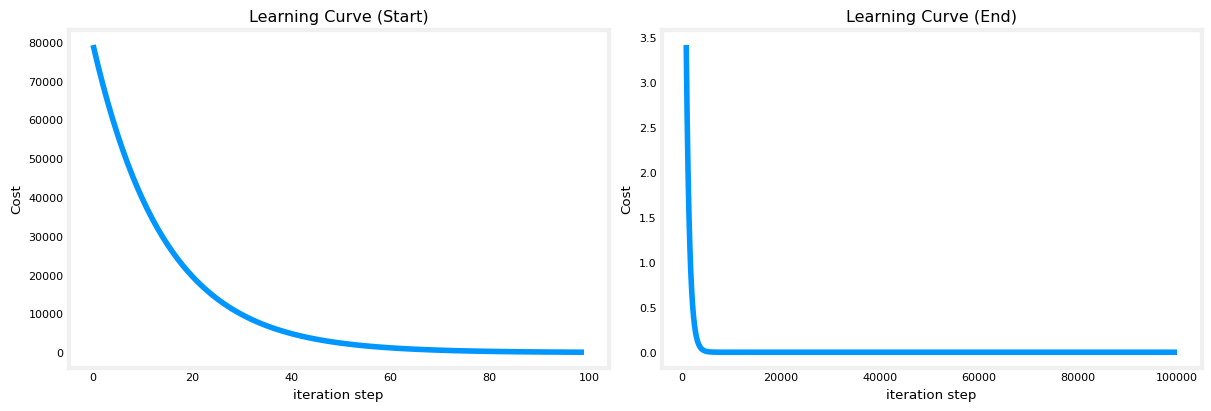

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Learning Curve (Start)");  ax2.set_title("Learning Curve (End)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

If you zoom into the center of the contour plot, you see that the arrows (which represent the steps of the iteration) bounce around after reaching close to the center which shows ineffeciency and preciseness that is not required.

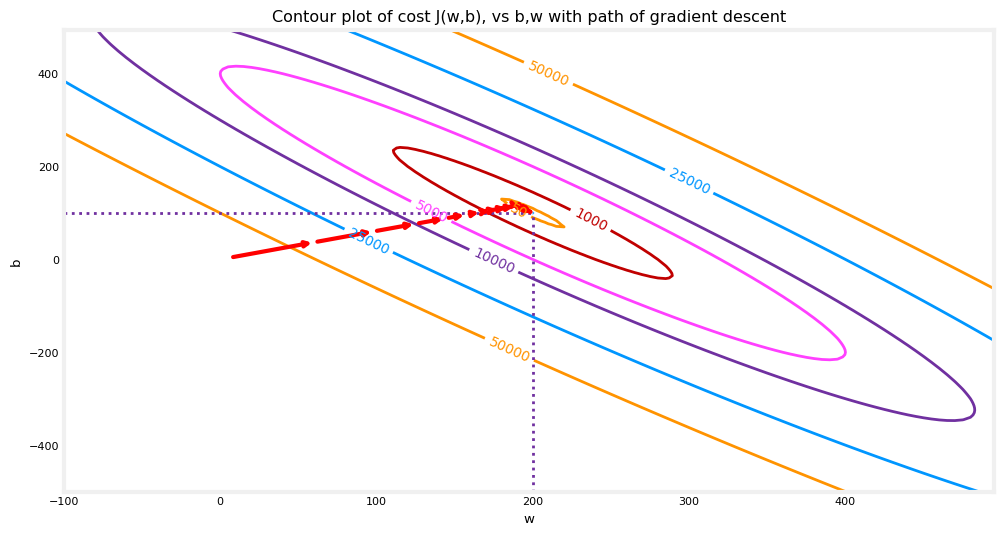

In [10]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)